<h1>Spotify Data Analysis and Visualization - Analiza i vizuelizacija podataka sa Spotify-a</h1>

<h4>Importing libaries and reading datasets - Učitavanje biblioteka i skupova podataka</h4>

In [33]:
import os
import numpy as np
import pandas as pd
import statsmodels as sm
import statsmodels.stats.descriptivestats as smsd
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
import plotly.offline as pyo
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('data/data.csv')
genre_data = pd.read_csv('data/data_by_genres.csv')
year_data = pd.read_csv('data/data_by_year.csv')
artist_data = pd.read_csv('data/data_by_artist.csv')
data_w_genre = pd.read_csv('data/data_w_genres.csv')
tracks_2022 = pd.read_csv('data/track_data.csv')

<h4>Dataset Information - Informacije o skupovima podataka</h4>

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [35]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [36]:
year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [37]:
artist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


In [38]:
data_w_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

In [39]:
tracks_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<h3>Data Analysis - Analiza podataka</h3>

<h4>Data Describing - Opisivanje podataka</h4>

In [40]:
smsd.describe(data)

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
nobs,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000
missing,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,9.839326e-02,116.861590
std_err,0.000637,0.062740,0.000910,0.000426,3.052963e+02,0.000648,0.000674,0.000759,0.008509,0.000423,0.013793,0.001102,0.052836,3.939468e-04,0.074336
upper_ci,0.529836,1976.910208,0.503899,0.538231,2.315467e+05,0.483659,0.085895,0.168497,5.216522,0.206668,-11.440956,0.709062,31.535351,9.916538e-02,117.007286
lower_ci,0.527339,1976.664273,0.500331,0.536560,2.303499e+05,0.481119,0.083255,0.165522,5.183167,0.205009,-11.495024,0.704743,31.328238,9.762114e-02,116.715893
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,1.627401e-01,30.708533
iqr,0.430000,43.000000,0.791000,0.253000,9.257300e+04,0.448000,0.000000,0.102000,6.000000,0.162200,7.432000,1.000000,37.000000,4.070000e-02,42.116000
iqr_normal,0.318759,31.875948,0.586369,0.187549,6.862447e+04,0.332103,0.000000,0.075613,4.447807,0.120239,5.509350,0.741301,27.428141,3.017096e-02,31.220638
mad,0.224497,22.152459,0.345115,0.143806,7.240758e+04,0.229740,0.154844,0.243959,3.064930,0.125223,4.454610,0.414383,18.497885,8.589210e-02,24.750380


<h4>Feature Correlation - Korelacija između ???</h4>

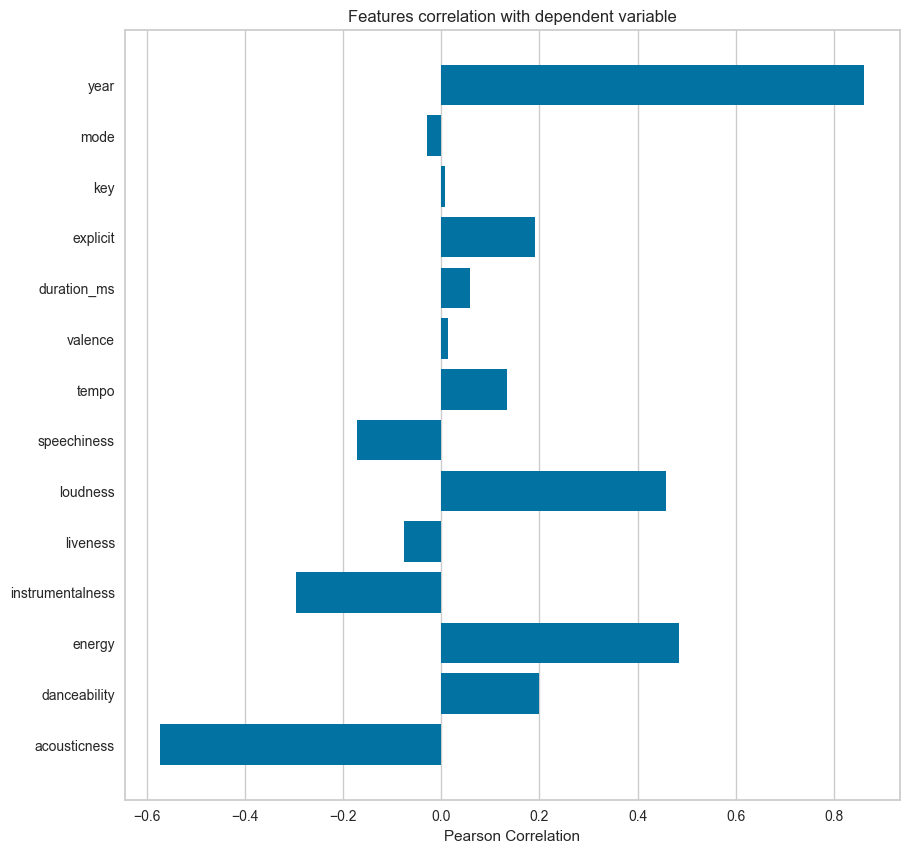

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [41]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(10,10)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

<h4>Feature trend over years - ???</h4>

<AxesSubplot:xlabel='count', ylabel='artist_genres'>

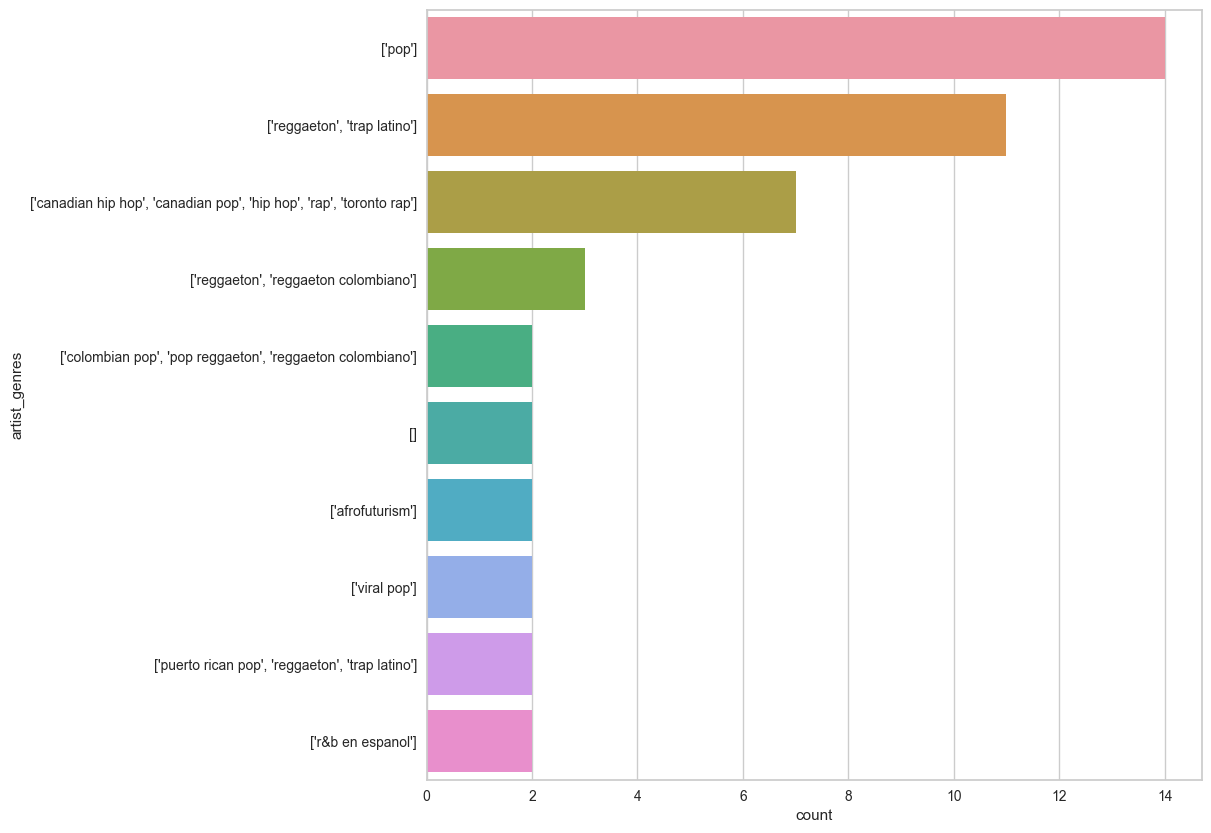

In [42]:
songs_by_popularity = tracks_2022.sort_values('track_popularity', ascending = False).head(100)
songs_by_popularity.head()

sns.countplot(y=songs_by_popularity['artist_genres'],order=songs_by_popularity['artist_genres'].value_counts().iloc[:10].index)

<h4>Number of songs per decades - Broj pesama po dekadama</h4>

<AxesSubplot:xlabel='decade', ylabel='count'>

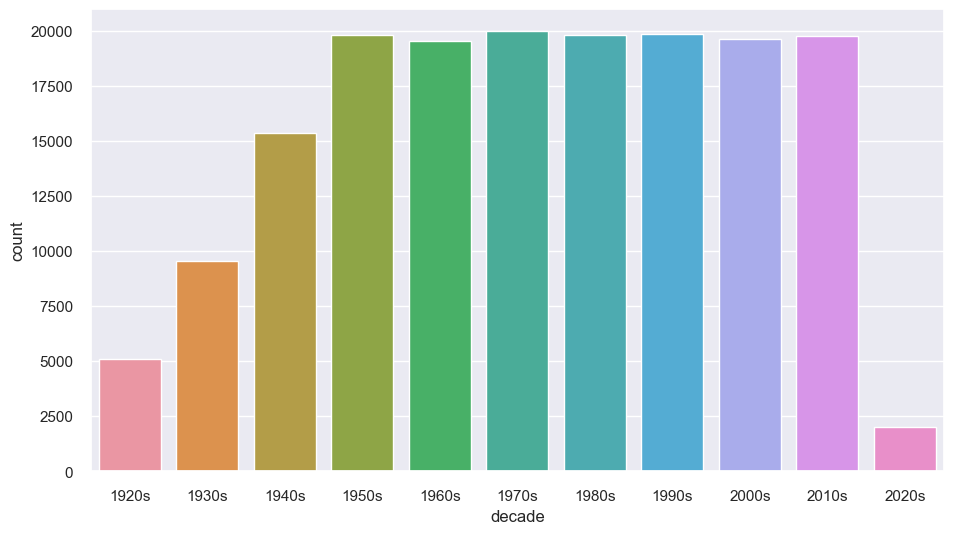

In [43]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(x=data['decade'])

<h4>Trend of song characteristics over the years - Trend karakteristika pesama tokom godina</h4>

In [44]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=features)
fig.show()

<h4>Comparing songs before 90s and songs after 90s - Upoređivanje pesama pre 90tih i pesama posle 90tih</h4>

C:\Users\jelen\AppData\Local\Temp\ipykernel_6880\1959543866.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\jelen\AppData\Local\Temp\ipykernel_6880\1959543866.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



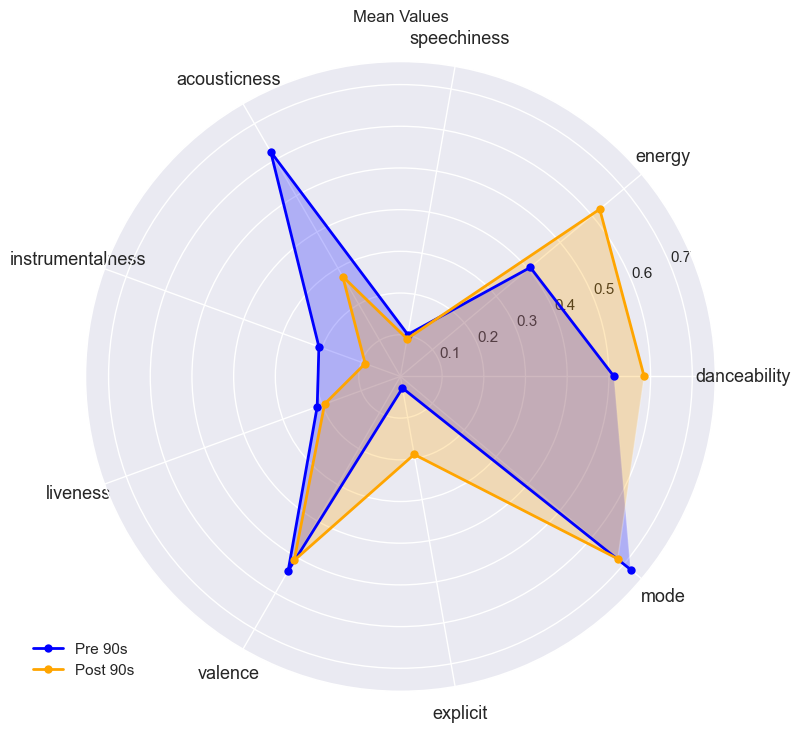

In [45]:
data_pre90 = data[data['year'] <= 1990]
data_post90 = data[data['year'] > 1990]
labels = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'explicit', 'mode']

mean_vals_pre90 = pd.DataFrame(columns=labels)
mean_vals_post90 = pd.DataFrame(columns=labels)
mean_vals_pre90 = mean_vals_pre90.append(data_pre90[labels].mean(), ignore_index=True)
mean_vals_post90 = mean_vals_post90.append(data_post90[labels].mean(), ignore_index=True)

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
fig = plt.figure(figsize = (18,18))
ax = fig.add_subplot(221, polar=True)
ax.plot(angles, mean_vals_pre90.iloc[0], 'o-', linewidth=2, label = "Pre 90s", color= 'blue')
ax.fill(angles, mean_vals_pre90.iloc[0], alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)

ax.plot(angles, mean_vals_post90.iloc[0], 'o-', linewidth=2, label = "Post 90s", color= 'orange')
ax.fill(angles, mean_vals_post90.iloc[0], alpha=0.25, facecolor='orange')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

<h4>Top 30 most popular genres from 2022 - Top 30 najpopularnijih žanrova 2022.</h4>

C:\Users\jelen\AppData\Local\Temp\ipykernel_6880\772510865.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jelen\AppData\Local\Temp\ipykernel_6880\772510865.py:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\jelen\AppData\Local\Temp\ipykernel_6880\772510865.py:7: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



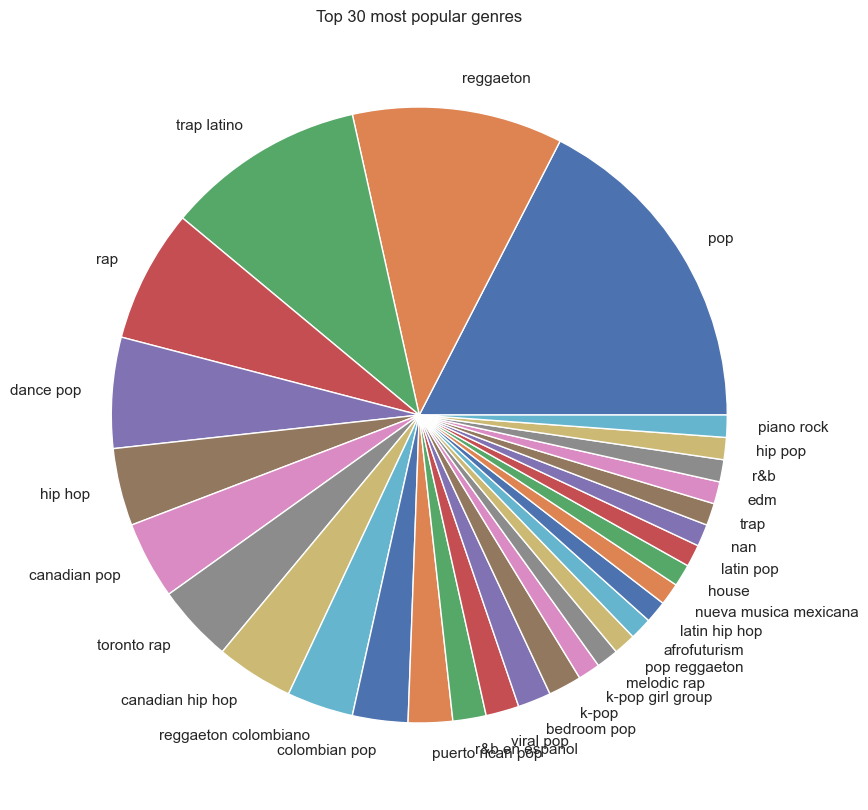

In [49]:
songs_by_popularity['artist_genres']=songs_by_popularity['artist_genres'].astype(str)
songs_by_popularity["artist_genres"][songs_by_popularity["artist_genres"] == "[]"] = np.nan
songs_by_popularity["artist_genres"] = songs_by_popularity["artist_genres"].fillna(0)
#here we get rid of useless symbols to be able to separate genres

songs_by_popularity.artist_genres=songs_by_popularity.artist_genres.str.replace("[", "")
songs_by_popularity.artist_genres=songs_by_popularity.artist_genres.str.replace("]", "")
songs_by_popularity.artist_genres=songs_by_popularity.artist_genres.str.replace("'", "")
songs_by_popularity.artist_genres=songs_by_popularity.artist_genres.str.strip()
#now we devide genre strings by comma
songs_by_popularity["artist_genres"] = songs_by_popularity["artist_genres"].str.split(",")

songs_by_popularity=songs_by_popularity.explode('artist_genres')
songs_by_popularity.artist_genres.unique()
fig = plt.figure(figsize = (10, 10))
ax = fig.subplots()
songs_by_popularity.artist_genres.value_counts()[:30].plot(ax=ax, kind = "pie")
ax.set_ylabel("")
ax.set_title("Top 30 most popular genres")
plt.show()

<h3>Music Recommender - Predlaganje muzike</h3>

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=False))
                                 ], verbose=False)
X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data['cluster_label'] = song_cluster_labels

In [59]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

load_dotenv()
cid = os.getenv('CLIENT_ID')
secret = os.getenv('SECRET')

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

def search_for_song(name, artist, year):
    song_data = {}
    results = sp.search(q= 'track: {} artist: {} year: {}'.format(name,artist, year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


def get_song_data(song, spotify_data):
    
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name']) 
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    
    except IndexError:
        return search_for_song(song['name'], song['artist'], song['year'])
        

def get_mean_vector(song_list, spotify_data):
    
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict


def recommend_songs( song_list, spotify_data, n_songs=10):
    
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

recommend_songs([{'name': 'Girls', 'artist': 'aespa', 'year':2022},
                {'name': 'Illusion', 'artist': 'aespa', 'year': 2022},
                {'name': '365', 'artist': 'ITZY', 'year': 2022},
                {'name': '28 Reasons', 'artist': 'Seulgi', 'year': 2022},
                {'name': 'Los Angeles', 'artist': 'Seulgi', 'year': 2022}],  data)

d:\Programs\Python\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



[{'name': 'DDU-DU DDU-DU', 'year': 2018, 'artists': "['BLACKPINK']"},
 {'name': 'Tinted Eyes (feat. blackbear & 24kGoldn)',
  'year': 2020,
  'artists': "['DVBBS', '24kGoldn', 'blackbear']"},
 {'name': 'goosebumps', 'year': 2016, 'artists': "['Travis Scott']"},
 {'name': "You Can't Stop Me", 'year': 2014, 'artists': "['Andy Mineo']"},
 {'name': 'COPYCAT - Sofi Tukker Remix',
  'year': 2018,
  'artists': "['Billie Eilish', 'Sofi Tukker']"},
 {'name': 'Black Swan', 'year': 2020, 'artists': "['BTS']"},
 {'name': 'Black Swan', 'year': 2020, 'artists': "['BTS']"},
 {'name': 'WANNABE', 'year': 2020, 'artists': "['ITZY']"},
 {'name': 'Party Rock Anthem',
  'year': 2011,
  'artists': "['LMFAO', 'Lauren Bennett', 'GoonRock']"},
 {'name': 'Peanut Butter Jelly', 'year': 2015, 'artists': "['Galantis']"}]